In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from python_analysis import *
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema


In [8]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [9]:

# we need informations to find the files:

# amplitudes vetor, contains the amplitudes of the file we want to analyze
#-2.313328, -2.316648 , -2.319366, -2.321592, -2.323414, -2.324906, -2.326127, -2.327127,-2.327946, -2.328616, -2.329165, -2.329614, -2.329982, -2.330283, -2.330530 dx = 0.005
#-2.330732 , -2.330897 , -2.331032, -2.331143, -2.331234, -2.331308 dx = 0.0025
# -2.331369 dx = 0.00125 a
#amplitude_vector = [ -2.313328, -2.316648 , -2.319366,-2.321592, -2.323414, -2.324906, -2.326127, -2.327127,-2.327946, -2.328616, -2.329165, -2.329614, -2.329982, -2.330283, -2.330530];
#amplitude_vector = [-2.330732 , -2.330897 , -2.331032, -2.331143, -2.331234, -2.331308]
amplitude_vector = [-2.331308]
#amplitude_vector = [-2.321592, -2.323414, -2.324906, -2.326127, -2.327127,-2.327946, -2.328616, -2.329165, -2.329614, -2.329982, -2.330283, -2.330530,-2.330732 , -2.330897 , -2.331032, -2.331143, -2.331234, -2.331308,-2.331369];
# time
range_time = 1
number_steps = 200
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step/2,len_step)

epsilon = [0.05]
dx = 0.0125

number_of_proc = 4

model = "model3"
data = [8]
names = names_generator(data,epsilon,amplitude_vector,number_of_proc,model,dx,number_steps,range_time)

print(len(names)/4)
#-2.313328 -2.316648 -2.319366 -2.321592 -2.323414 -2.324906 -2.326127 -2.327127 -2.327946 -2.328616 -2.329165 -2.329614 -2.329982 -2.330283 -2.330530 -2.330732 -2.330897 -2.331032 -2.331143

1.0


In [10]:
big_DF = []

In [11]:
h1 = float(dx)
h2 = h1/2
h3 = h2/2
domain_lenght = 2.5
dmin = 0
dmax = 2.5
gl = 2
gr = 2
for p in range(int(len(names)/4)):
    print("----->",p)
    big_DF=big_DF+read_parallel_data(dmax,dmin,gl,gr,domain_lenght,h1,h2,h3,number_of_proc,number_steps,names[p*4:p*4+4])
print(len(big_DF))

-----> 0
[205, 405, 805]
49 52 55
run:0 ->./data8/processor_0_ampl_-2.331308_eps0.050000_dx_0.012500steps200last_time1.000000.csv added
number of runs: 4
1


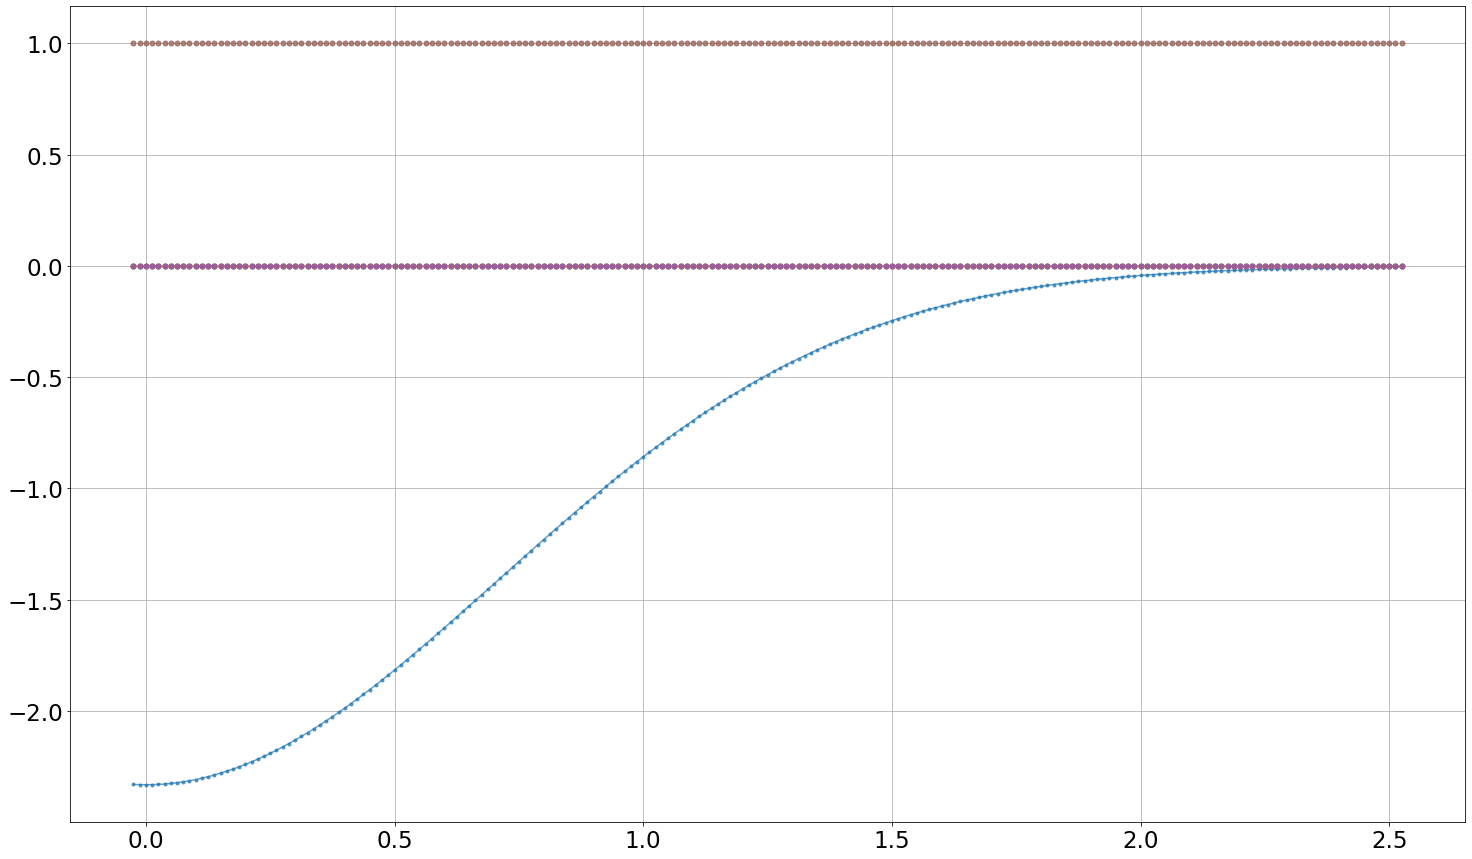

In [6]:
# plot of the initial conditions
for n in range(0,1):
    for i in range(0,1):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],'.-',alpha=0.7,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],'.-',alpha=0.7,markersize=5,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],'.',alpha=0.7,markersize=10,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field3'],'.',alpha=0.7,markersize=10,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field4'],'.',alpha=0.7,markersize=10,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field5'],'.',alpha=0.7,markersize=10,label="field 2")


#plt.legend()
plt.grid()
#plt.xlim([-1, 5.5])
#plt.ylim([-10, 1])

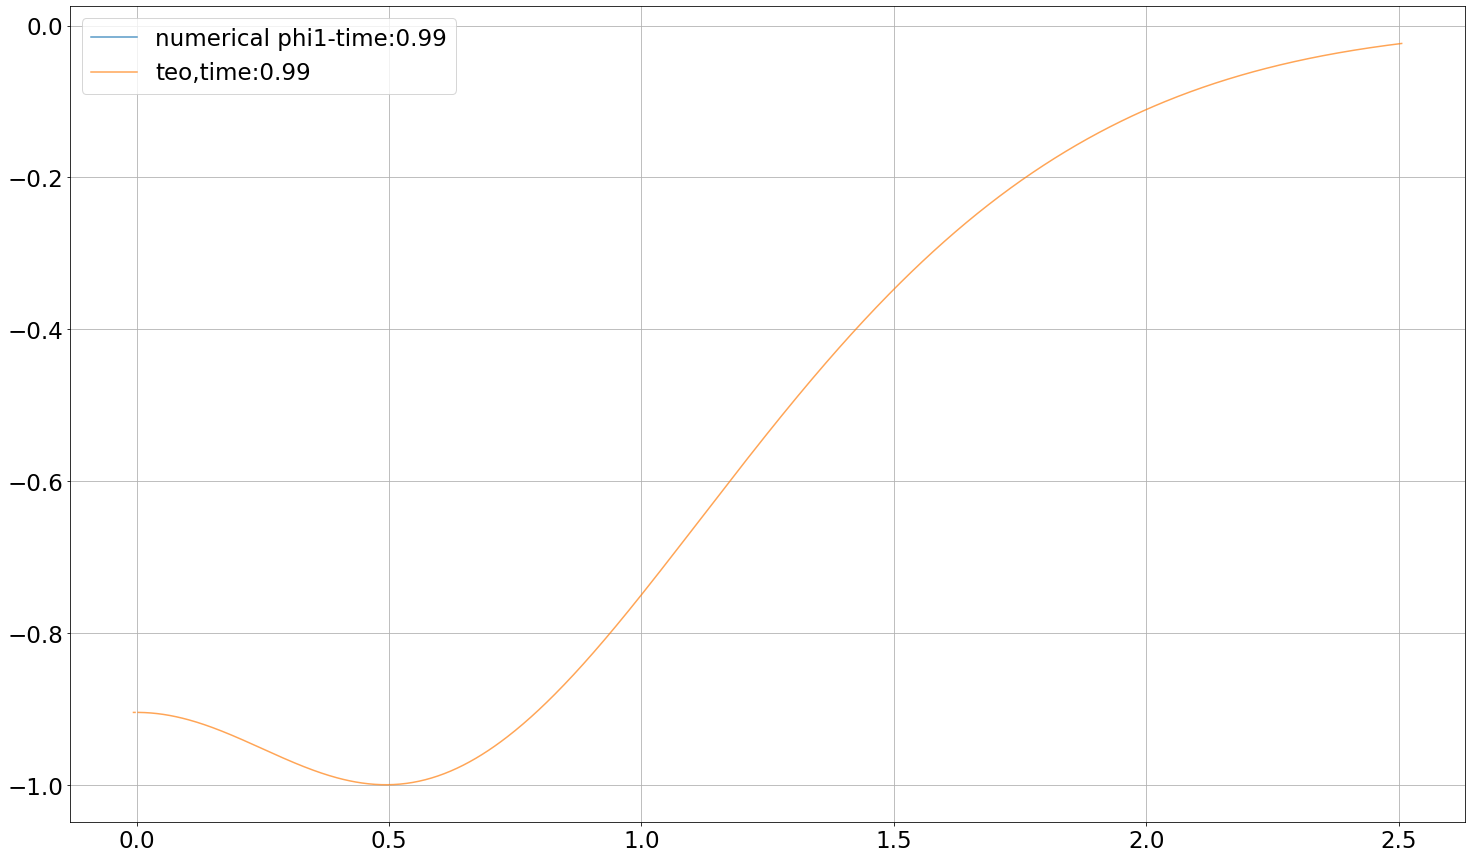

In [13]:
for n in [0]:
    for i in range(2,3):        
        for j in range(198,199):
            #plt.plot(X[j],big_DF[n][i][j]['field0'],alpha=0.6,markersize=15,label="time:"+str(times[j])+"e:"+amplitude_vector[n])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],alpha=0.5,markersize=8,label=times[j])
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.75,markersize=5,label="numerical phi1-time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field3'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field4'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field5'],alpha=0.8,markersize=8,label="5")
            plt.plot(big_DF[n][i][j]['x'],model3_gaussian_solution(big_DF[n][i][j]['x'],times[j],float(amplitude_vector[0])),markersize=5,alpha=0.7,label="teo,time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],spherical_we_solution(big_DF[n][i][j]['x'],times[j],1,1))
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_we_solution(big_DF[n][i][j]['x'],times[j],1,1/5,5),'.-',alpha=0.5,label='theoretical')
            #plt.plot(big_DF[n][i][j]['x'],initial_test(big_DF[n][i][j]['x'],times[j],1,1./5.,5))
            
plt.grid()
#plt.xlim([-5.5,-4])
#plt.ylim([ 0.08,0.1] )
#plt.yscale('log')
plt.legend()


## Convergence test and out put

### Self convergence test

/home/giulio/Università/Thesis/code/data/model3/python_analysis.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return(np.log(norm_diff_1/norm_diff_2)/np.log(2.0))
/home/giulio/Università/Thesis/code/data/model3/python_analysis.py:100: RuntimeWarning: invalid value encountered in double_scalars
  norm = norm + vect[i]**2 *x[i]**2 *dx
/home/giulio/Università/Thesis/code/data/model3/python_analysis.py:100: RuntimeWarning: overflow encountered in double_scalars
  norm = norm + vect[i]**2 *x[i]**2 *dx


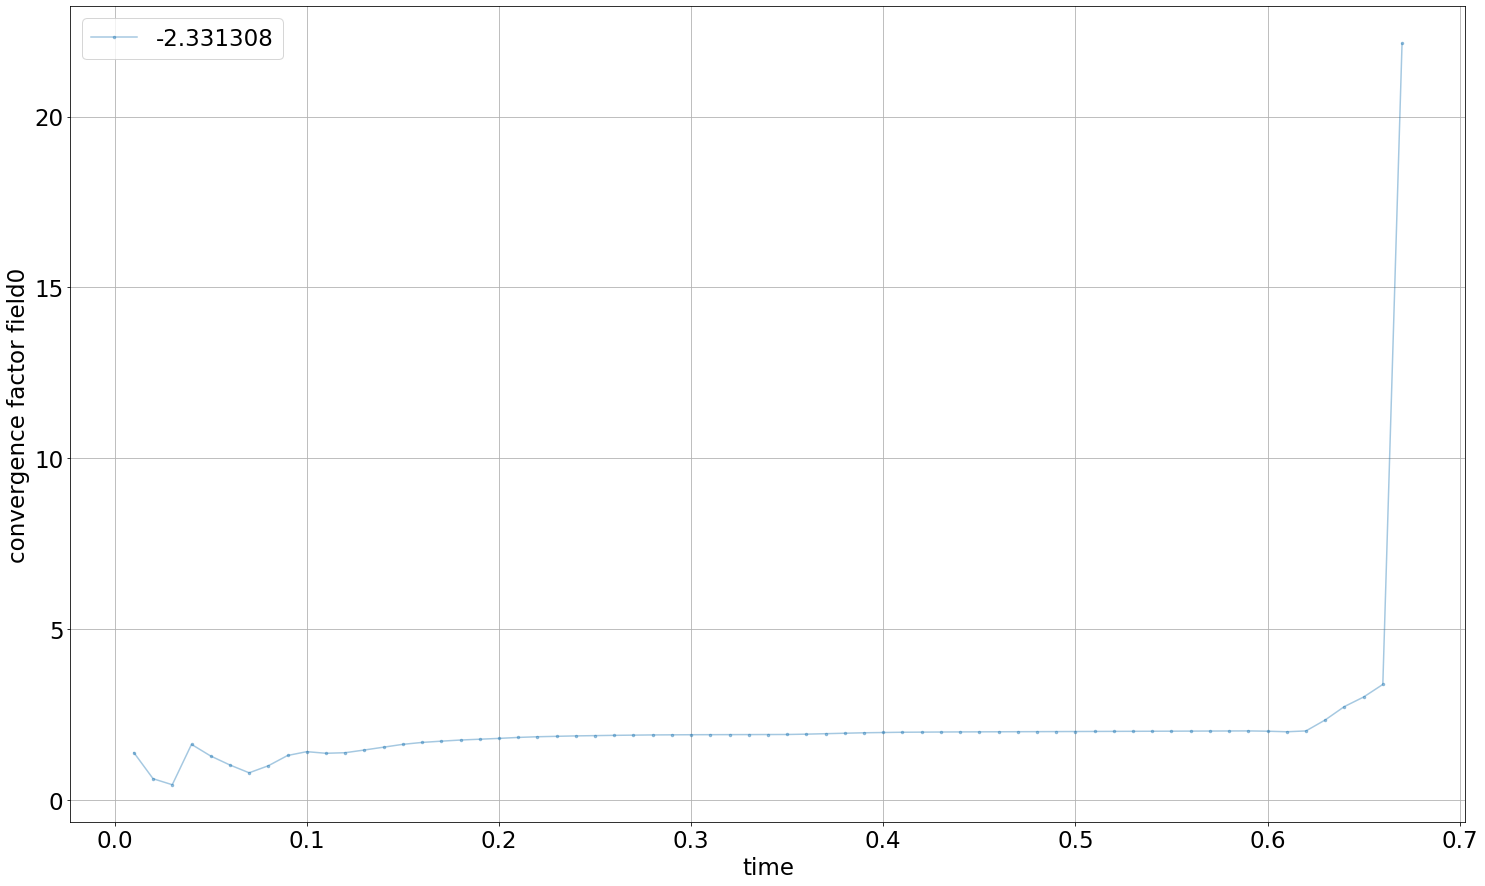

In [25]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
field = "field0"

for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4,label=amplitude_vector[n])
#plt.xlim(0,30)
#plt.ylim(1.5,2.5)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

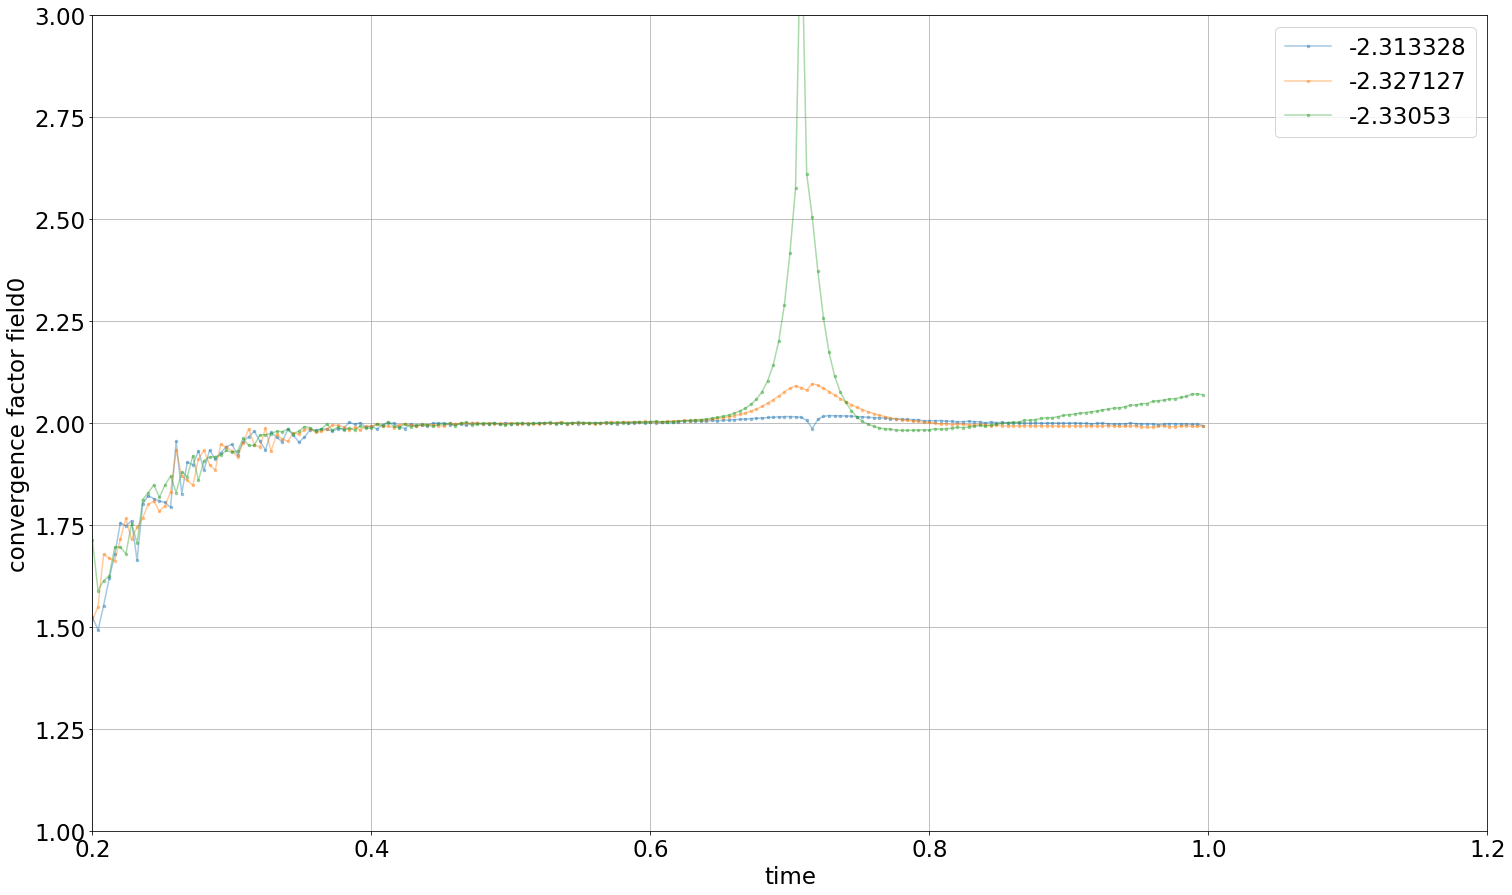

In [17]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
field = "field0"

for n in [0,7,14]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4,label=amplitude_vector[n])
plt.xlim(0.2,1.2)
plt.ylim(1,3)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

### Pointwise convergence
The function self_conv_test compute a difference vector between the resolution 0 and 1, and 4 times a difference vector between resolution 1 and 2. The two vector should theoretically coincide.

In [6]:
n_ind = 0
field = "field0"
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,field))
    #plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
#plt.ylabel('pointwise convergence factor')
#plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

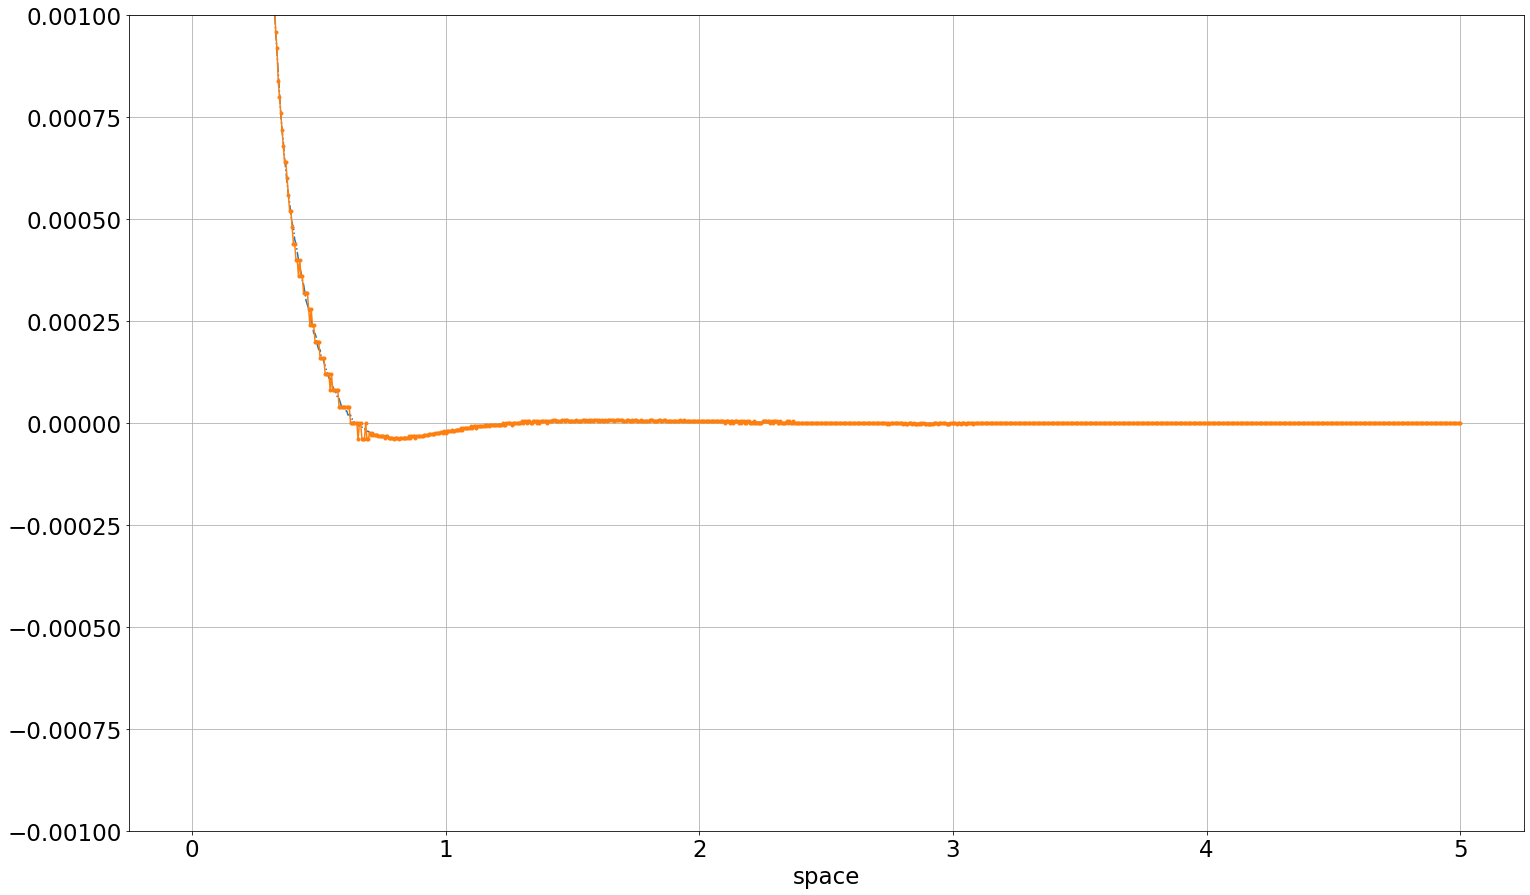

In [8]:
ylim_inf = -0.001
ylim_sup = 0.001
plot_pw_convergence(big_DF,gl,gr,self_conv_test_vect_pw,model,data,field,epsilon,n_ind,dx,number_steps,ylim_inf,ylim_sup)

## Evolutions' videos of the functions

### Animation of a singular field

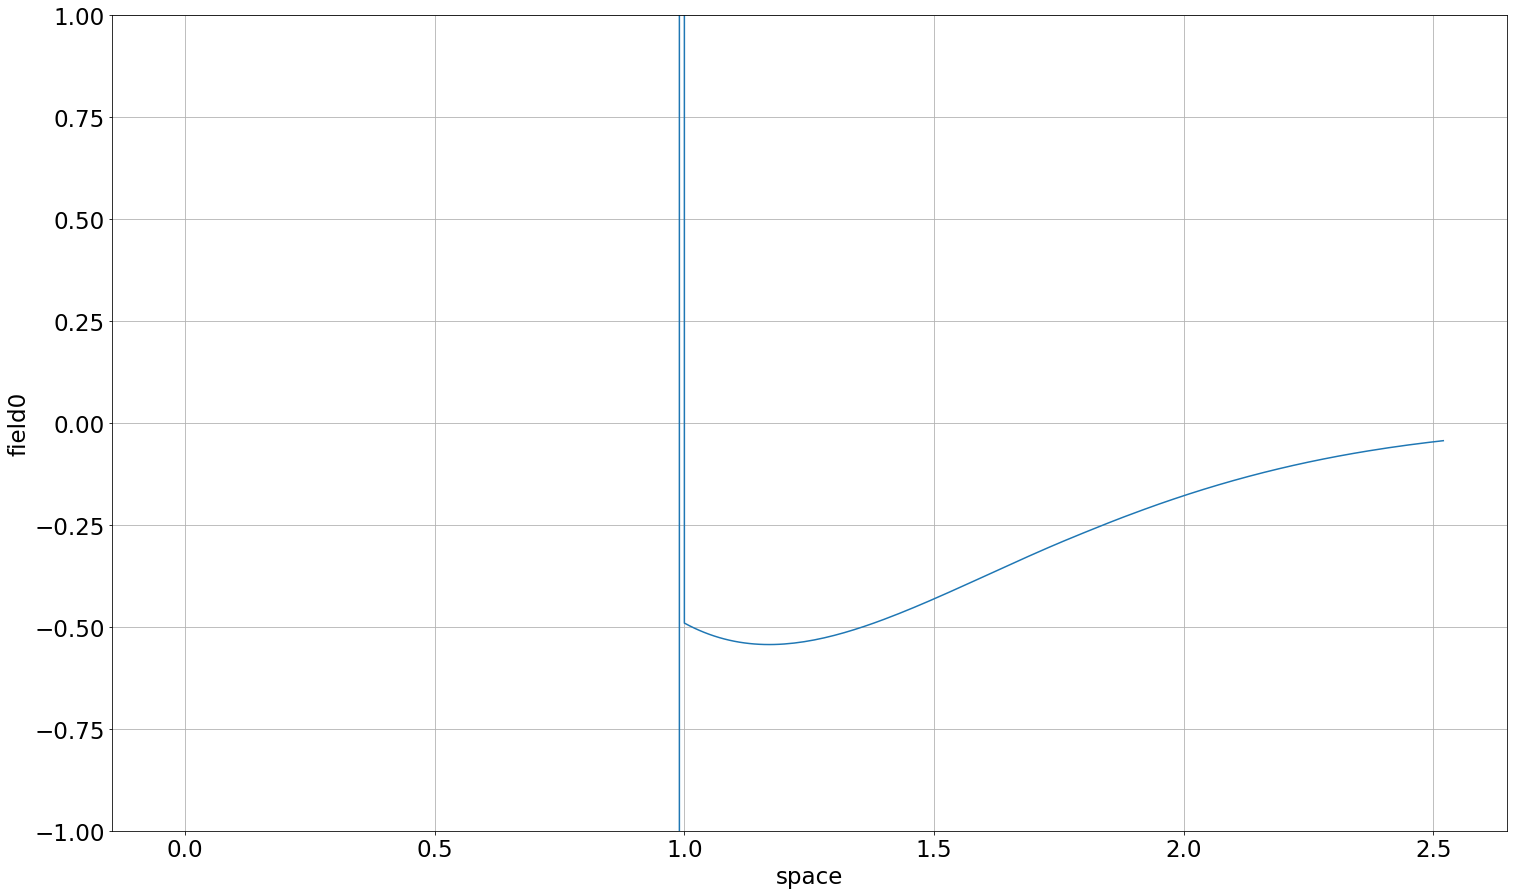

In [9]:
ylim_inf = -1
ylim_sup = 1
field_number = 0
h_ind = 0
big_DF_ind = 0
animate_one_field(field_number,h_ind,big_DF_ind,model,data,big_DF,ylim_inf,ylim_sup,number_steps)

### Animation of multiple fields

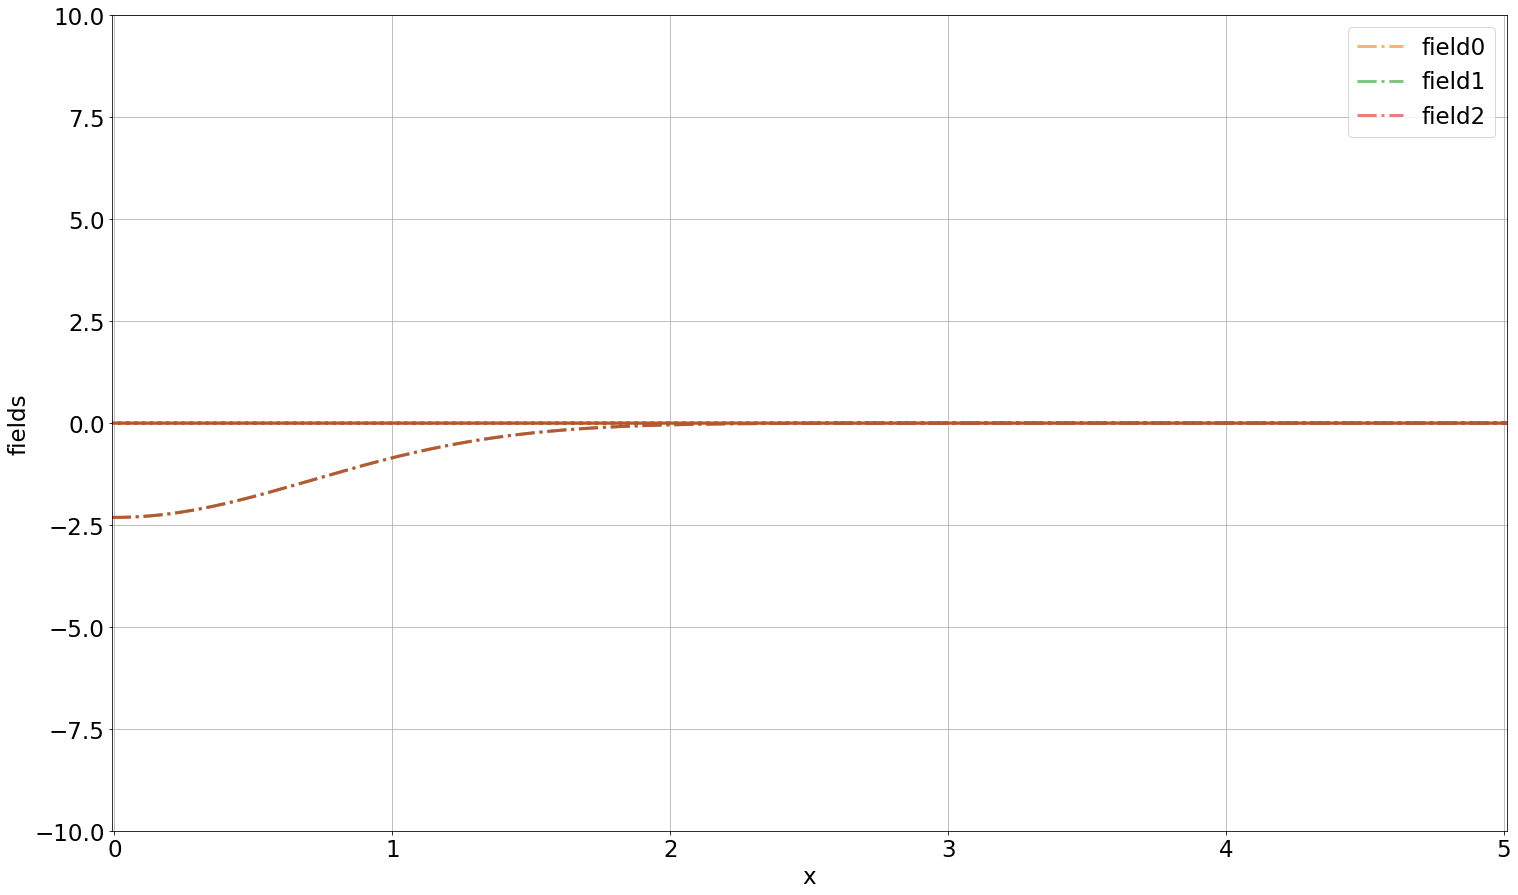

In [11]:
fields_to_print = ["field0","field1","field2"]
ylim_inf = -10
ylim_sup = 10
h_ind = 0
big_DF_ind = 0
animate_multiple_fields(big_DF,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,ylim_inf,ylim_sup,number_steps,domain_lenght)

### Theoretical comparisons

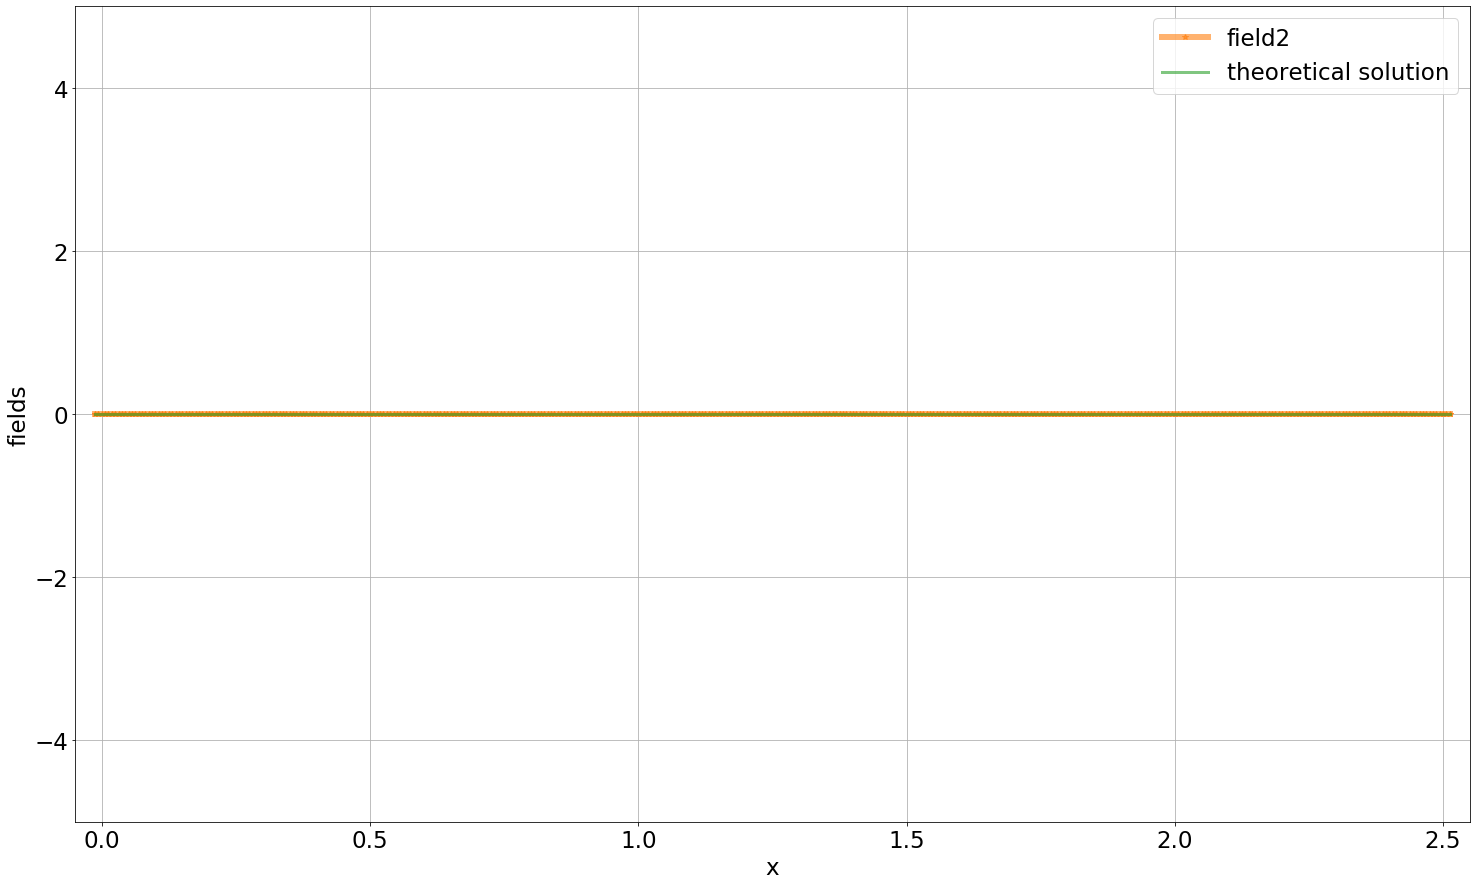

In [7]:
fields_to_print = ["field2","theoretical"]
ylim_inf = -5
ylim_sup = 5
h_ind = 2
big_DF_ind = 0
theoretical_comparison(big_DF,model3_gaussian_solution,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector)



## Plot of the power law scaling for the CSS and DSS models

In [6]:
maximums = []
amplitudes_vector = []


In [12]:
# we compute the maximums over all times for each run (they have different initial amplitude)
maximums = maximums+ runs_maximums_vector(big_DF,2,'field0')
for n in range(len(amplitude_vector)):
    amplitudes_vector.append(amplitude_vector[n])
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)-len(amplitude_vector),len(amplitudes_vector)):
    amplitudes_vector[i] = 2.3316439816+ amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
print(len(amplitudes_for_fit))
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [0.018315981600000253, 0.014995981600000263, 0.012277981600000043, 0.010051981600000204, 0.008229981599999991, 0.006737981600000165, 0.005516981600000026, 0.004516981600000136, 0.003697981600000233, 0.0030279816000002846, 0.00247898159999993, 0.00202998160000023, 0.0016619815999998622, 0.0013609815999999775, 0.0011139816000000913, -2.330732, -2.330897, -2.331032, -2.331143, -2.331234, -2.331308]
21
maximum [13.6006, 14.0252, 14.3759, 14.6717, 14.9126, 17.3391, 22.4286, 27.7882, 33.2415, 38.6043, 43.7242, 48.4625, 52.7406, 56.5029, 59.7526, 62.1453, 64.4231, 66.3001, 67.8406, 69.0929, 70.0984]
intercept: 0.5917041016069651 angular coefficient [0.49418668]


Text(0, 0.5, 'maximum PI overall times')

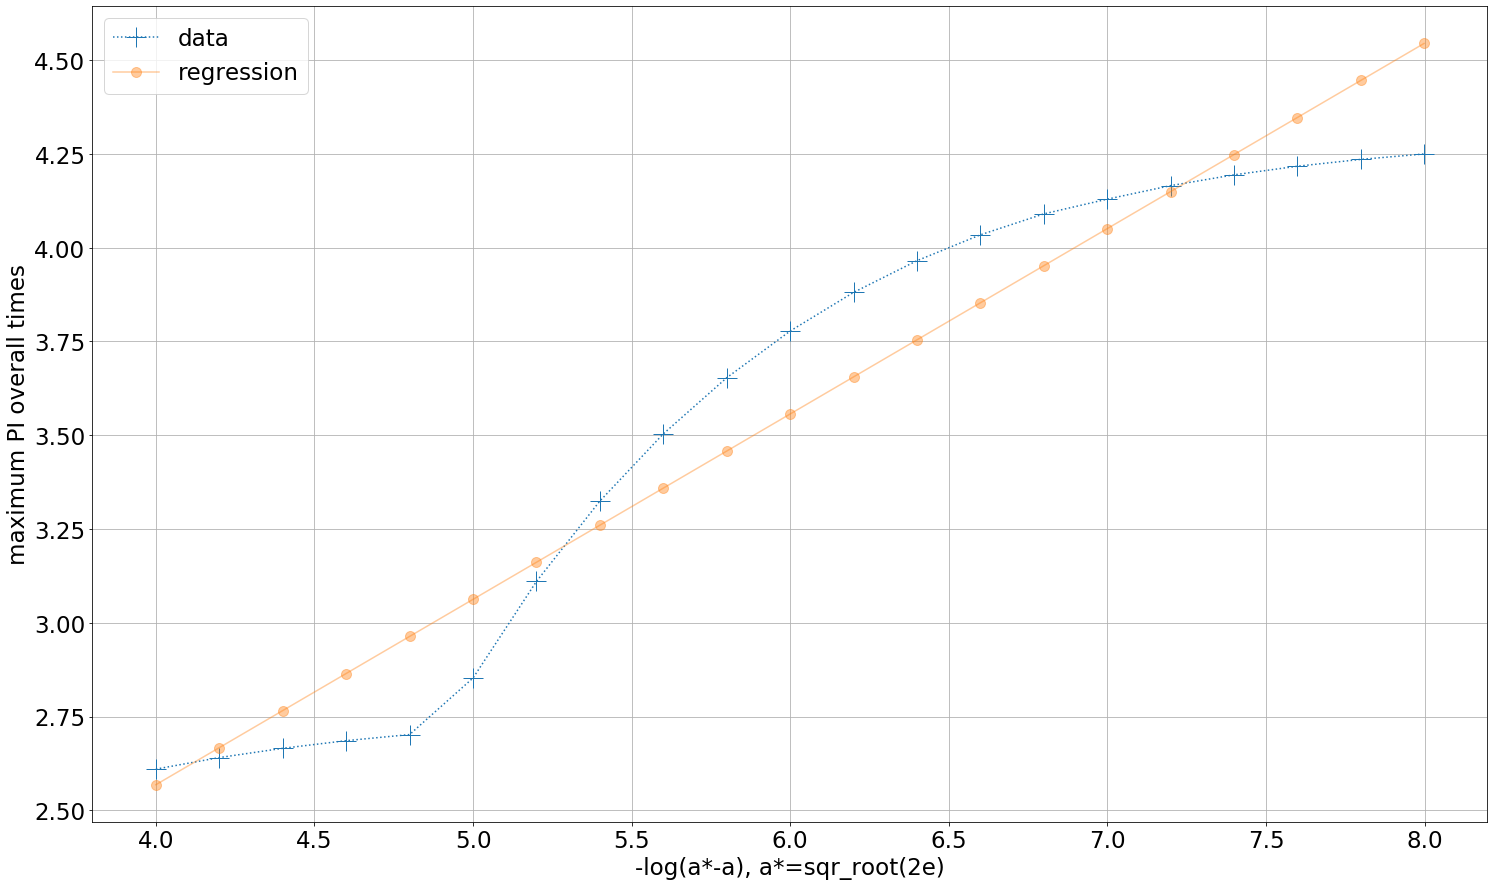

In [13]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')
#RESULTS: intercept: 0.796531249552912 angular coefficient [0.49825299]

### Production of the amplitudes to analyze

In [6]:
amplitudes_vector_creator(4,7,2.3316439816,0.2)


array([2.31332834, 2.3166484 , 2.31936664, 2.32159215, 2.32341423,
       2.32490603, 2.32612742, 2.3271274 , 2.32794612, 2.32861643,
       2.32916523, 2.32961455, 2.32998242, 2.33028361, 2.33053021])

In [13]:
def temporal_vector(fields,times,big_DF,h_ind,big_DF_ind):
    temporal_field = []
    for field in fields:
        temporal_field_i = []
        for j in range(len(times)-1):
            temporal_field_i.append(big_DF[big_DF_ind][h_ind][j][field])
        temporal_field.append(temporal_field_i)
    return(temporal_field)

In [30]:
h_ind = 2
big_DF_ind = 0
fields = ["field0","field1","field2","field3","field4","field5"]
temporal_field = temporal_vector(fields,times,big_DF,h_ind,big_DF_ind)

Text(0.5, 1.0, 'field0')

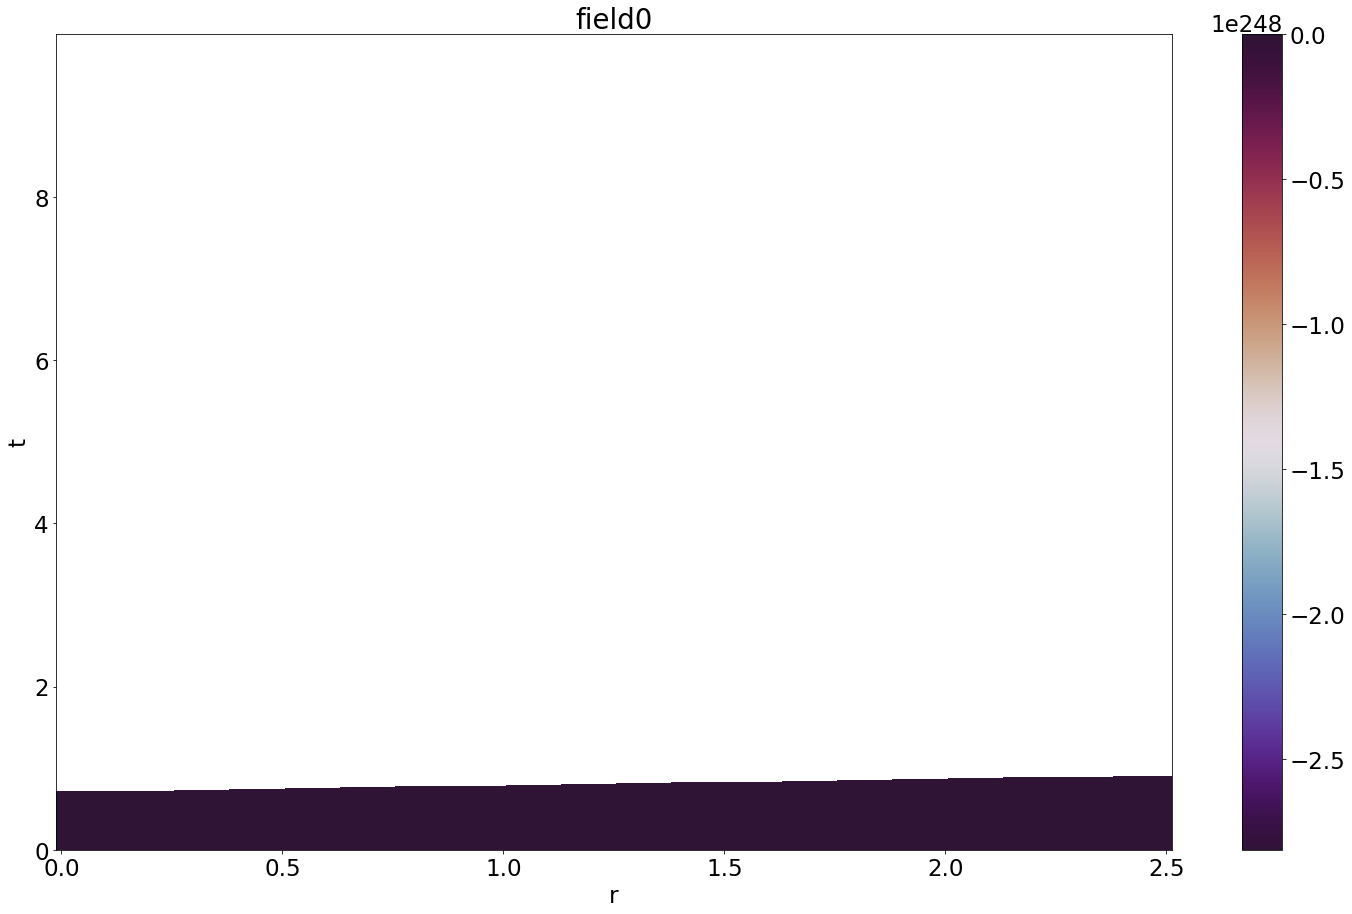

In [31]:
field_ind = 0
y = times[:-1]
x = big_DF[big_DF_ind][h_ind][0]['x']
plt.pcolormesh(x,y,temporal_field[field_ind],cmap='twilight_shifted')
plt.colorbar( orientation="vertical")
#plt.ylim([0,8])
plt.xlabel('r')
plt.ylabel('t')
plt.title(fields[field_ind])